# Logistic Regression

# Output variable -> y

# y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

# Attribute Information:


1.age (numeric)                 
2.job : type of job     (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')                         
3.marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')           
4.default: has credit in default? (categorical: 'no','yes','unknown')                     
5.balance: average yearly balance, in euros (numeric)                          
6.housing: has housing loan? (categorical: 'no','yes','unknown')                           
7.loan: has personal loan? (categorical: 'no','yes','unknown')                        
8.contact: contact communication type (categorical:'cellular','telephone')                            
9.day: last contact day of the month (numeric 1 -31)                                              
10.month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')                       
11.duration: last contact duration, in seconds (numeric).                                         


# Important Note:

This attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.                     

12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)             
13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                         
14.previous: number of contacts performed before this campaign and for this client (numeric)                  
15.poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')               
16.target: has the client subscribed a term deposit? (binary:"yes","no")               


In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [19]:
bank=pd.read_csv("bank-full.csv",sep =';')

In [20]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,42,student,married,unknown,no,-7,no,no,telephone,31,jul,41,6,-1,0,unknown,no
18804,44,admin.,divorced,secondary,no,611,no,no,cellular,31,jul,6,10,-1,0,unknown,no
18805,49,technician,married,secondary,no,8973,no,no,cellular,31,jul,9,10,-1,0,unknown,no
18806,34,student,single,secondary,no,188,yes,no,cellular,31,jul,12,5,-1,0,unknown,no


In [21]:
#EDA
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18808 entries, 0 to 18807
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        18808 non-null  int64 
 1   job        18808 non-null  object
 2   marital    18808 non-null  object
 3   education  18808 non-null  object
 4   default    18808 non-null  object
 5   balance    18808 non-null  int64 
 6   housing    18808 non-null  object
 7   loan       18808 non-null  object
 8   contact    18808 non-null  object
 9   day        18808 non-null  int64 
 10  month      18808 non-null  object
 11  duration   18808 non-null  int64 
 12  campaign   18808 non-null  int64 
 13  pdays      18808 non-null  int64 
 14  previous   18808 non-null  int64 
 15  poutcome   18807 non-null  object
 16  y          18807 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.4+ MB


In [22]:
data = pd.get_dummies(bank,columns = ['job','marital','education','contact','poutcome','month'])
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,1,0,0,0,1,1,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,1,0,0,0,0,1,1,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,1,0,0,0,0,1,1,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,1,1,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,42,no,-7,no,no,31,41,6,-1,0,...,0,0,1,0,1,0,1,1,0,0
18804,44,no,611,no,no,31,6,10,-1,0,...,1,0,0,1,0,0,1,1,0,0
18805,49,no,8973,no,no,31,9,10,-1,0,...,1,0,0,1,0,0,1,1,0,0
18806,34,no,188,yes,no,31,12,5,-1,0,...,1,0,0,1,0,0,1,1,0,0


In [23]:
# To see all columns
pd.set_option("display.max.columns", None)
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,42,no,-7,no,no,31,41,6,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0
18804,44,no,611,no,no,31,6,10,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
18805,49,no,8973,no,no,31,9,10,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
18806,34,no,188,yes,no,31,12,5,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18808 entries, 0 to 18807
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  18808 non-null  int64 
 1   default              18808 non-null  object
 2   balance              18808 non-null  int64 
 3   housing              18808 non-null  object
 4   loan                 18808 non-null  object
 5   day                  18808 non-null  int64 
 6   duration             18808 non-null  int64 
 7   campaign             18808 non-null  int64 
 8   pdays                18808 non-null  int64 
 9   previous             18808 non-null  int64 
 10  y                    18807 non-null  object
 11  job_admin.           18808 non-null  uint8 
 12  job_blue-collar      18808 non-null  uint8 
 13  job_entrepreneur     18808 non-null  uint8 
 14  job_housemaid        18808 non-null  uint8 
 15  job_management       18808 non-null  uint8 
 16  job_

In [25]:
# Custom Binary Encoding of Binary o/p variables 
data['default'] = np.where(data['default'].str.contains("yes"), 1, 0)
data['housing'] = np.where(data['housing'].str.contains("yes"), 1, 0)
data['loan'] = np.where(data['loan'].str.contains("yes"), 1, 0)
data['y'] = np.where(data['y'].str.contains("yes"), 1, 0)
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,42,0,-7,0,0,31,41,6,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0
18804,44,0,611,0,0,31,6,10,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
18805,49,0,8973,0,0,31,9,10,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
18806,34,0,188,1,0,31,12,5,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18808 entries, 0 to 18807
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  18808 non-null  int64
 1   default              18808 non-null  int32
 2   balance              18808 non-null  int64
 3   housing              18808 non-null  int32
 4   loan                 18808 non-null  int32
 5   day                  18808 non-null  int64
 6   duration             18808 non-null  int64
 7   campaign             18808 non-null  int64
 8   pdays                18808 non-null  int64
 9   previous             18808 non-null  int64
 10  y                    18808 non-null  int32
 11  job_admin.           18808 non-null  uint8
 12  job_blue-collar      18808 non-null  uint8
 13  job_entrepreneur     18808 non-null  uint8
 14  job_housemaid        18808 non-null  uint8
 15  job_management       18808 non-null  uint8
 16  job_retired          1

In [27]:
#Model Building
# Dividing our data into input and output variables
X=pd.concat([data.iloc[:,0:10],data.iloc[:,11:]],axis=1)
Y=data.iloc[:,10]

In [28]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [29]:
#Model Predictions
# Predict for x dataset
Y_pred=classifier.predict(X)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
Y_pred_df=pd.DataFrame({'actual_y':Y,'y_pred_prob':Y_pred})
Y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18803,0,0
18804,0,0
18805,0,0
18806,0,0


In [31]:
#Testing Model Accuracy
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,Y_pred)
confusion_matrix

array([[17783,   182],
       [  589,   254]], dtype=int64)

In [34]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
((17783+254)/(17783+182+589+254))

0.959006805614632

In [35]:
# As accuracy = 0.9590, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(X)[:,1] 

array([0.00285376, 0.00332271, 0.00476699, ..., 0.00270263, 0.00729021,
       0.01391333])

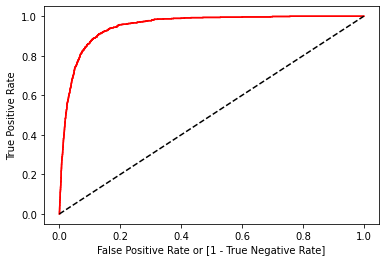

auc accuracy: 0.6455870268371444


In [36]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y,Y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)